# House Price

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVC, SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import xgboost as xgb

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Load Dataset

In [3]:
df = pd.read_csv("houseprice.csv", sep=";", decimal=",")
df.head()

Id     SalePrice  MSSubClass MSZoning  LotFrontage  LotArea Street Alley  \
0  1461  1.692771e+09          20       RH         80.0    11622   Pave   NaN   
1  1462  1.877584e+08          20       RL         81.0    14267   Pave   NaN   
2  1463  1.835837e+09          60       RL         74.0    13830   Pave   NaN   
3  1464  1.793175e+09          60       RL         78.0     9978   Pave   NaN   
4  1465  1.507301e+05         120       RL         43.0     5005   Pave   NaN   

  LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0      Reg         Lvl    AllPub    Inside       Gtl          mes      Feedr   
1      IR1         Lvl    AllPub    Corner       Gtl          mes       Norm   
2      IR1         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
3      IR1         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
4      IR1         HLS    AllPub    Inside       Gtl      StoneBr       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     1Story            5            6       1961   
1       Norm     1Fam     1Story            6            6       1958   
2       Norm     1Fam     2Story            5            5       1997   
3       Norm     1Fam     2Story            6            6       1998   
4       Norm   TwnhsE     1Story            8            5       1992   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          1961     Gable  CompShg     VinylSd     VinylSd       None   
1          1958       Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace   
2          1998     Gable  CompShg     VinylSd     VinylSd       None   
3          1998     Gable  CompShg     VinylSd     VinylSd    BrkFace   
4          1992     Gable  CompShg     HdBoard     HdBoard       None   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         0.0        TA        TA     CBlock       TA       TA           No   
1       108.0        TA        TA     CBlock       TA       TA           No   
2         0.0        TA        TA      PConc       Gd       TA           No   
3        20.0        TA        TA      PConc       TA       TA           No   
4         0.0        Gd        TA      PConc       Gd       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          Rec       468.0          LwQ       144.0      270.0        882.0   
1          ALQ       923.0          Unf         0.0      406.0       1329.0   
2          GLQ       791.0          Unf         0.0      137.0        928.0   
3          GLQ       602.0          Unf         0.0      324.0        926.0   
4          ALQ       263.0          Unf         0.0     1017.0       1280.0   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        TA          Y      SBrkr       896         0             0   
1    GasA        TA          Y      SBrkr      1329         0             0   
2    GasA        Gd          Y      SBrkr       928       701             0   
3    GasA        Ex          Y      SBrkr       926       678             0   
4    GasA        Ex          Y      SBrkr      1280         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0        896           0.0           0.0         1         0             2   
1       1329           0.0           0.0         1         1             3   
2       1629           0.0           0.0         2         1             3   
3       1604           0.0           0.0         2         1             3   
4       1280           0.0           0.0         2         0             2   

   KitchebvGr KitchenQual  TotRmsAbvGrd Functiol  Fireplaces FireplaceQu  \
0           1          TA             5      Typ           0         NaN   
1           1          Gd             6      Typ           0         NaN   
2           1          TA            

### Explore Dataset

In [4]:
df.dtypes

Id                 int64
SalePrice        float64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1       float64
BsmtFinType2      object
BsmtFinSF2       float64
BsmtUnfSF        float64
TotalBsmtSF      float64


In [5]:
df.describe()

Id     SalePrice   MSSubClass  LotFrontage       LotArea  \
count  1459.000000  1.459000e+03  1459.000000  1232.000000   1459.000000   
mean   2190.000000  1.623874e+09    57.378341    68.580357   9819.161069   
std     421.321334  5.220746e+08    42.746880    22.376841   4955.517327   
min    1461.000000  1.507301e+05    20.000000    21.000000   1470.000000   
25%    1825.500000  1.634315e+09    20.000000    58.000000   7391.000000   
50%    2190.000000  1.776682e+09    50.000000    67.000000   9399.000000   
75%    2554.500000  1.855991e+09    70.000000    80.000000  11517.500000   
max    2919.000000  2.816440e+09   190.000000   200.000000  56600.000000   

       OverallQual  OverallCond    YearBuilt  YearRemodAdd   MasVnrArea  \
count  1459.000000  1459.000000  1459.000000   1459.000000  1444.000000   
mean      6.078821     5.553804  1971.357779   1983.662783   100.709141   
std       1.436812     1.113740    30.390071     21.130467   177.625900   
min       1.000000     1.000000  1879.000000   1950.000000     0.000000   
25%       5.000000     5.000000  1953.000000   1963.000000     0.000000   
50%       6.000000     5.000000  1973.000000   1992.000000     0.000000   
75%       7.000000     6.000000  2001.000000   2004.000000   164.000000   
max      10.000000     9.000000  2010.000000   2010.000000  1290.000000   

        BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF  \
count  1458.000000  1458.000000  1458.000000  1458.000000  1459.000000   
mean    439.203704    52.619342   554.294925  1046.117970  1156.534613   
std     455.268042   176.753926   437.260486   442.898624   398.165820   
min       0.000000     0.000000     0.000000     0.000000   407.000000   
25%       0.000000     0.000000   219.250000   784.000000   873.500000   
50%     350.500000     0.000000   460.000000   988.000000  1079.000000   
75%     753.500000     0.000000   797.750000  1305.000000  1382.500000   
max    4010.000000  1526.000000  2140.000000  5095.000000  5095.000000   

          2ndFlrSF  LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath  \
count  1459.000000   1459.000000  1459.000000   1457.000000   1457.000000   
mean    325.967786      3.543523  1486.045922      0.434454      0.065202   
std     420.610226     44.043251   485.566099      0.530648      0.252468   
min       0.000000      0.000000   407.000000      0.000000      0.000000   
25%       0.000000      0.000000  1117.500000      0.000000      0.000000   
50%       0.000000      0.000000  1432.000000      0.000000      0.000000   
75%     676.000000      0.000000  1721.000000      1.000000      0.000000   
max    1862.000000   1064.000000  5095.000000      3.000000      2.000000   

          FullBath     HalfBath  BedroomAbvGr   KitchebvGr  TotRmsAbvGrd  \
count  1459.000000  1459.000000   1459.000000  1459.000000   1459.000000   
mean      1.570939     0.377656      2.854010     1.042495      6.385195   
std       0.555190     0.503017      0.829788     0.208472      1.508895   
min       0.000000     0.000000      0.000000     0.000000      3.000000   
25%       1.000000     0.000000      2.000000     1.000000      5.000000   
50%       2.000000     0.000000      3.000000     1.000000      6.000000   
75%       2.000000     1.000000      3.000000     1.000000      7.000000   
max       4.000000     2.000000      6.000000     2.000000     15.000000   

       Fireplaces  GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  \
count  1459.00000  1381.000000  1458.000000  1458.000000  1459.000000   
mean      0.58122  1977.721217     1.766118   472.768861    93.174777   
std       0.64742    26.431175     0.775945   217.048611   127.744882   
min       0.00000  1895.000000     0.000000     0.000000     0.000000   
25%       0.00000  1959.000000     1.000000   318.000000     0.000000   
50%       0.00000  1979.000000     2.000000   480.000000     0.000000   
75%       1.00000  2002.000000     2.000000   576.000000   168.000000   
max       4.00000  2207.0

In [6]:
df.corr()

Id  SalePrice  MSSubClass  LotFrontage   LotArea  \
Id             1.000000   0.083566    0.004993     0.009930  0.051492   
SalePrice      0.083566   1.000000   -0.088354     0.165529  0.243114   
MSSubClass     0.004993  -0.088354    1.000000    -0.450505 -0.359537   
LotFrontage    0.009930   0.165529   -0.450505     1.000000  0.644608   
LotArea        0.051492   0.243114   -0.359537     0.644608  1.000000   
OverallQual   -0.064887   0.046382    0.034690     0.182870  0.107989   
OverallCond    0.009553  -0.003407   -0.071768    -0.092312 -0.103402   
YearBuilt     -0.058647   0.030842    0.040848     0.122356  0.048314   
YearRemodAdd  -0.079437   0.028111    0.046319     0.092603  0.036907   
MasVnrArea    -0.021424   0.059904   -0.012186     0.251533  0.188691   
BsmtFinSF1    -0.045966   0.022960   -0.058775     0.204621  0.185470   
BsmtFinSF2     0.015862  -0.050256   -0.079093     0.046824  0.054199   
BsmtUnfSF      0.001203   0.059025   -0.111080     0.092031  0.071681   
TotalBsmtSF   -0.039731   0.061818   -0.201648     0.315802  0.283049   
1stFlrSF      -0.017911   0.114631   -0.245603     0.461239  0.456417   
2ndFlrSF      -0.009939   0.094834    0.311430    -0.036185 -0.007862   
LowQualFinSF  -0.020007  -0.038922    0.005021    -0.037294 -0.012457   
GrLivArea     -0.025112   0.172615    0.068829     0.357125  0.366324   
BsmtFullBath  -0.031440   0.009534    0.016106     0.127314  0.094052   
BsmtHalfBath   0.006907   0.010994   -0.001643    -0.042779 -0.008378   
FullBath      -0.063543   0.062403    0.146489     0.163078  0.147871   
HalfBath      -0.050263   0.070172    0.180206     0.023850  0.079581   
BedroomAbvGr   0.001038   0.212482    0.005541     0.205100  0.181171   
KitchebvGr    -0.017382   0.032312    0.238016     0.016072 -0.031830   
TotRmsAbvGrd   0.000716   0.196715    0.041294     0.344366  0.289576   
Fireplaces    -0.035924   0.049971   -0.064357     0.257037  0.282210   
GarageYrBlt   -0.051925   0.030749    0.090604     0.082069  0.018330   
GarageCars    -0.053865   0.091160   -0.052788     0.336373  0.263398   
GarageArea    -0.050941   0.099004   -0.108000     0.375581  0.315841   
WoodDeckSF     0.015664   0.043124   -0.022539     0.157426  0.158483   
OpenPorchSF   -0.002045   0.047592   -0.025421     0.179795  0.164815   
EnclosedPorch  0.020999  -0.070737   -0.029051     0.013340  0.099850   
3SsnPorch     -0.025896  -0.023612   -0.029709    -0.037487 -0.001846   
ScreenPorch    0.025566   0.006989   -0.071978     0.113444  0.088712   
PoolArea       0.049535   0.003002   -0.017790     0.134232  0.140494   
MiscVal       -0.005744  -0.005324   -0.045835     0.068161  0.139071   
MoSold         0.143358   0.089336    0.011366     0.008810  0.005152   
YrSold        -0.974884  -0.079527   -0.008392    -0.025263 -0.051144   

               OverallQual  OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  \
Id               -0.064887     0.009553  -0.058647     -0.079437   -0.021424   
SalePrice         0.046382    -0.003407   0.030842      0.028111    0.059904   
MSSubClass        0.034690    -0.071768   0.040848      0.046319   -0.012186   
LotFrontage       0.182870    -0.092312   0.122356      0.092603    0.251533   
LotArea           0.107989    -0.103402   0.048314      0.036907    0.188691   
OverallQual       1.000000    -0.095874   0.621910      0.591267    0.453991   
OverallCond      -0.095874     1.000000  -0.361027      0.021668   -0.144261   
YearBuilt         0.621910    -0.361027   1.000000      0.631696    0.312404   
YearRemodAdd      0.591267     0.021668   0.631696      1.000000    0.213937   
MasVnrArea        0.453991    -0.144261   0.312404      0.213937    1.000000   
BsmtFinSF1        0.322583    -0.054720   0.309595      0.175219    0.343267   
BsmtFinSF2       -0.028199     0.043109  -0.008174     -0.056320    0.037546   
BsmtUnfSF         0.243070    -0.139927   0.111892      0.148773    0.064672   
TotalBsmtSF       0.560314    -0.177190   0.425447   

<AxesSubplot:>

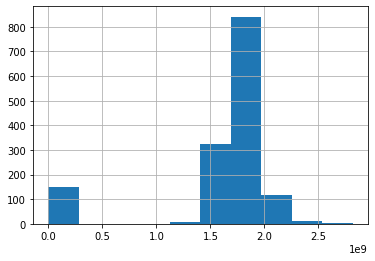

In [7]:
#Distribution of data
df.SalePrice.hist()

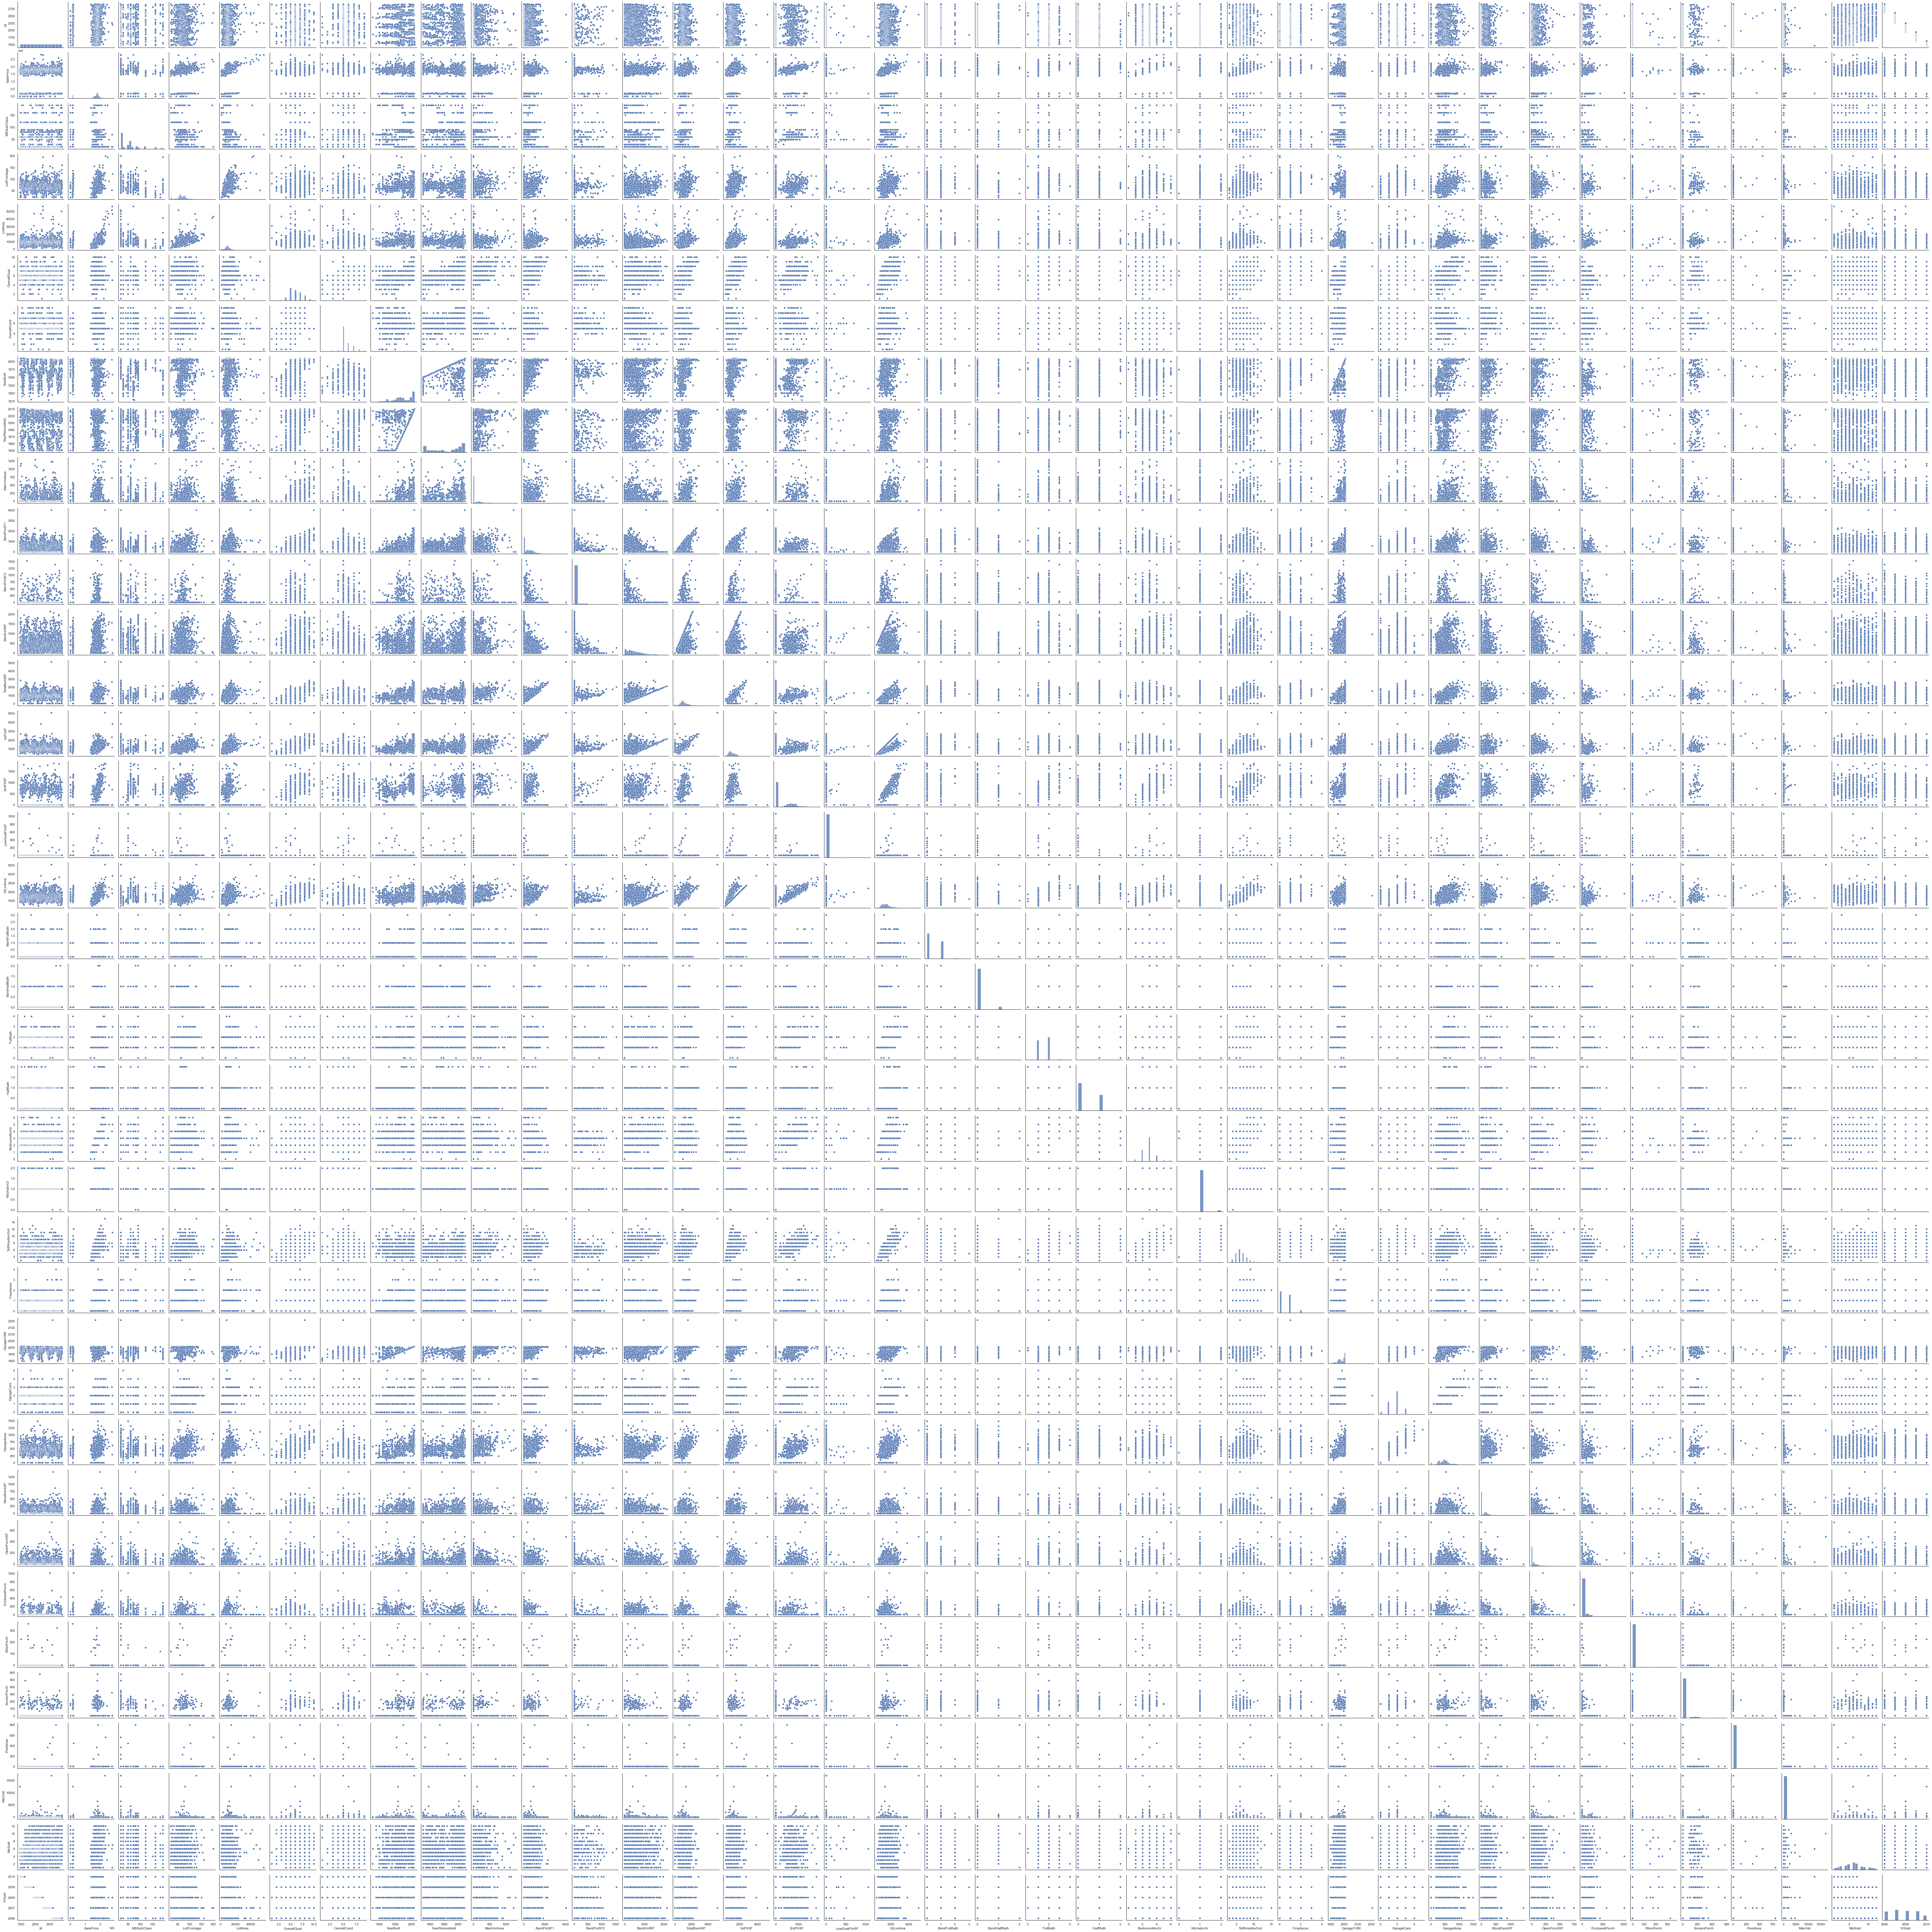

In [202]:
#Search outliers
sns.pairplot(df)

<AxesSubplot:>

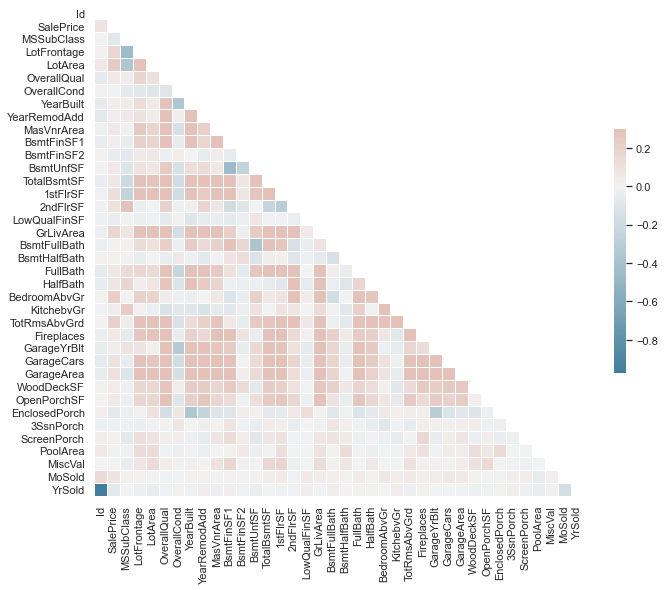

In [8]:
sns.set_theme(style="white")

# Generate a large random dataset
rs = np.random.RandomState(33)

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [9]:
#How many NaN
df.isna().sum()

Id                  0
SalePrice           0
MSSubClass          0
MSZoning            4
LotFrontage       227
LotArea             0
Street              0
Alley            1352
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         16
MasVnrArea         15
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           44
BsmtCond           45
BsmtExposure       44
BsmtFinType1       42
BsmtFinSF1          1
BsmtFinType2       42
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF  

In [10]:
df.shape

(1459, 81)

In [11]:
df.head(1)

Id     SalePrice  MSSubClass MSZoning  LotFrontage  LotArea Street Alley  \
0  1461  1.692771e+09          20       RH         80.0    11622   Pave   NaN   

  LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0      Reg         Lvl    AllPub    Inside       Gtl          mes      Feedr   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     1Story            5            6       1961   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          1961     Gable  CompShg     VinylSd     VinylSd       None   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         0.0        TA        TA     CBlock       TA       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          Rec       468.0          LwQ       144.0      270.0        882.0   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        TA          Y      SBrkr       896         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0        896           0.0           0.0         1         0             2   

   KitchebvGr KitchenQual  TotRmsAbvGrd Functiol  Fireplaces FireplaceQu  \
0           1          TA             5      Typ           0         NaN   

  GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual  \
0     Attchd       1961.0          Unf         1.0       730.0         TA   

  GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
0         TA          Y         140            0              0          0   

   ScreenPorch  PoolArea PoolQC  Fence MiscFeature  MiscVal  MoSold  YrSold  \
0          120         0    NaN  MnPrv         NaN        0       6    2010   

  SaleType SaleCondition  
0       WD        Normal

### Delete NaN

In [46]:
df_cl = df.copy()

In [47]:
df_cl = df_cl.dropna(subset=['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'KitchenQual', 'Functiol', 'GarageCars', 'GarageArea', 'SaleType'])

In [48]:
df_cl.shape

(1447, 81)

In [49]:
df_cl.isna().sum()

Id                  0
SalePrice           0
MSSubClass          0
MSZoning            0
LotFrontage       225
LotArea             0
Street              0
Alley            1341
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType         16
MasVnrArea         15
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           39
BsmtCond           40
BsmtExposure       39
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       37
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF  

In [50]:
df_cl = df_cl.drop(["Alley", "PoolQC", "Fence", "MiscFeature"], axis=1)

In [51]:
cols_nona = df_cl.columns[df_cl.notna().all()]

In [109]:
df_nona = df_cl[cols_nona].copy()

In [110]:
df_nona.isna().sum()

Id               0
SalePrice        0
MSSubClass       0
MSZoning         0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
ExterQual        0
ExterCond        0
Foundation       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchebvGr       0
KitchenQual      0
TotRmsAbvGrd     0
Functiol         0
Fireplaces       0
GarageCars       0
GarageArea       0
PavedDrive       0
WoodDeckSF  

In [111]:
#Type of variables
df_nona.dtypes

Id                 int64
SalePrice        float64
MSSubClass         int64
MSZoning          object
LotArea            int64
Street            object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
ExterQual         object
ExterCond         object
Foundation        object
BsmtFinSF1       float64
BsmtFinSF2       float64
BsmtUnfSF        float64
TotalBsmtSF      float64
Heating           object
HeatingQC         object
CentralAir        object
Electrical        object
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath     float64


### Create dummy variables

In [112]:
df_objects = df_nona.select_dtypes(include='object')

In [113]:
for c in df_objects.columns.values:
    dummy = pd.get_dummies(df_nona[c])
    df_nona = pd.concat([df_nona, dummy], axis=1)
    df_nona = df_nona.drop(c, axis=1)

In [114]:
df_nona.dtypes

Id                 int64
SalePrice        float64
MSSubClass         int64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
BsmtFinSF1       float64
BsmtFinSF2       float64
BsmtUnfSF        float64
TotalBsmtSF      float64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath     float64
BsmtHalfBath     float64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchebvGr         int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageCars       float64
GarageArea       float64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
C (all)            uint8
FV                 uint8
RH                 uint8
RL                 uint8
RM                 uint8


In [127]:
len(dummy_columns)

171

In [130]:
df_combine = df_nona.groupby(df_nona.columns, axis=1).sum()

In [133]:
df_combine.head()

1.5Fin  1.5Unf  1Fam  1Story  1stFlrSF  2.5Unf  2Story  2fmCon  2ndFlrSF  \
0     0.0     0.0   1.0     1.0     896.0     0.0     0.0     0.0       0.0   
1     0.0     0.0   1.0     1.0    1329.0     0.0     0.0     0.0       0.0   
2     0.0     0.0   1.0     0.0     928.0     0.0     1.0     0.0     701.0   
3     0.0     0.0   1.0     0.0     926.0     0.0     1.0     0.0     678.0   
4     0.0     0.0   0.0     1.0    1280.0     0.0     0.0     0.0       0.0   

   3SsnPorch  Abnorml  AdjLand  AllPub  Alloca  Artery  AsbShng  AsphShn  \
0        0.0      0.0      0.0     1.0     0.0     0.0      0.0      0.0   
1        0.0      0.0      0.0     1.0     0.0     0.0      0.0      0.0   
2        0.0      0.0      0.0     1.0     0.0     0.0      0.0      0.0   
3        0.0      0.0      0.0     1.0     0.0     0.0      0.0      0.0   
4        0.0      0.0      0.0     1.0     0.0     0.0      0.0      0.0   

   BedroomAbvGr  Blmngtn  Blueste  Bnk  BrDale  Brk Cmn  BrkComm  BrkFace  \
0           2.0      0.0      0.0  0.0     0.0      0.0      0.0      0.0   
1           3.0      0.0      0.0  0.0     0.0      0.0      0.0      0.0   
2           3.0      0.0      0.0  0.0     0.0      0.0      0.0      0.0   
3           3.0      0.0      0.0  0.0     0.0      0.0      0.0      0.0   
4           2.0      0.0      0.0  0.0     0.0      0.0      0.0      0.0   

   BrkSide  BrkTil  BsmtFinSF1  BsmtFinSF2  BsmtFullBath  BsmtHalfBath  \
0      0.0     0.0       468.0       144.0           0.0           0.0   
1      0.0     0.0       923.0         0.0           0.0           0.0   
2      0.0     0.0       791.0         0.0           0.0           0.0   
3      0.0     0.0       602.0         0.0           0.0           0.0   
4      0.0     0.0       263.0         0.0           0.0           0.0   

   BsmtUnfSF  C (all)  CBlock  COD  CWD  CemntBd  ClearCr  CmentBd  CollgCr  \
0      270.0      0.0     1.0  0.0  0.0      0.0      0.0      0.0      0.0   
1      406.0      0.0     1.0  0.0  0.0      0.0      0.0      0.0      0.0   
2      137.0      0.0     0.0  0.0  0.0      0.0      0.0      0.0      0.0   
3      324.0      0.0     0.0  0.0  0.0      0.0      0.0      0.0      0.0   
4     1017.0      0.0     0.0  0.0  0.0      0.0      0.0      0.0      0.0   

   CompShg  Con  ConLD  ConLI  ConLw  Corner  Crawfor  CulDSac  Duplex  \
0      1.0  0.0    0.0    0.0    0.0     0.0      0.0      0.0     0.0   
1      1.0  0.0    0.0    0.0    0.0     1.0      0.0      0.0     0.0   
2      1.0  0.0    0.0    0.0    0.0     0.0      0.0      0.0     0.0   
3      1.0  0.0    0.0    0.0    0.0     0.0      0.0      0.0     0.0   
4      1.0  0.0    0.0    0.0    0.0     0.0      0.0      0.0     0.0   

   Edwards  EnclosedPorch   Ex  FR2  FR3   FV   Fa  Family  Feedr  Fireplaces  \
0      0.0            0.0  0.0  0.0  0.0  0.0  0.0     0.0    1.0         0.0   
1      0.0            0.0  0.0  0.0  0.0  0.0  0.0     0.0    0.0         0.0   
2      0.0            0.0  0.0  0.0  0.0  0.0  0.0     0.0    0.0         1.0   
3      0.0            0.0  1.0  0.0  0.0  0.0  0.0     0.0    0.0         1.0   
4      0.0            0.0  1.0  0.0  0.0  0.0  0.0     0.0    0.0         0.0   

   Flat  FullBath  FuseA  FuseF  FuseP  Gable  Gambrel  GarageArea  \
0   0.0       1.0    0.0    0.0    0.0    1.0      0.0       730.0   
1   0.0       1.0    0.0    0.0    0.0    0.0      0.0       312.0   
2   0.0       2.0    0.0    0.0    0.0    1.0      0.0       482.0   
3   0.0       2.0    0.0    0.0    0.0    1.0      0.0       470.0   
4   0.0       2.0    0.0    0.0    0.0    1.0      0.0       506.0   

   GarageCars  GasA  GasW   Gd  Gilbert  GrLivArea  Grav  Grvl  Gtl  HLS  \
0         1.0   1.0   0.0  0.0      0.0      896.0   0.0   0.0  1.0  0.0   
1         1.0   1.0   0.0  1.0      0.0     1329.0   0.0   0.0  1.0  0.0   
2         2.0   1.0   0.0  1.0      1.0     1629.0   0.0   0.0  1.0  0.0   
3         2.0   1.0   0.0  1.0 

## Models

In [134]:
df_combine = df_combine.drop("Id", axis=1)

KeyError: "['Id'] not found in axis"

### Standard Data

In [147]:
std = StandardScaler()
df_scale = std.fit_transform(df_combine)
df_scale = pd.DataFrame(df_scale, columns=df_combine.columns.values)

In [148]:
df_scale.shape

(1447, 172)

In [149]:
df_scale.head()

1.5Fin    1.5Unf      1Fam    1Story  1stFlrSF    2.5Unf    2Story  \
0 -0.350108 -0.058885  0.461420  0.981512 -0.660532 -0.091446 -0.645940   
1 -0.350108 -0.058885  0.461420  0.981512  0.442610 -0.091446 -0.645940   
2 -0.350108 -0.058885  0.461420 -1.018837 -0.579006 -0.091446  1.548132   
3 -0.350108 -0.058885  0.461420 -1.018837 -0.584102 -0.091446  1.548132   
4 -0.350108 -0.058885 -2.167222  0.981512  0.317774 -0.091446 -0.645940   

     2fmCon  2ndFlrSF  3SsnPorch   Abnorml   AdjLand  AllPub    Alloca  \
0 -0.147962 -0.776290  -0.089197 -0.251374 -0.074561     0.0 -0.087522   
1 -0.147962 -0.776290  -0.089197 -0.251374 -0.074561     0.0 -0.087522   
2 -0.147962  0.888419  -0.089197 -0.251374 -0.074561     0.0 -0.087522   
3 -0.147962  0.833800  -0.089197 -0.251374 -0.074561     0.0 -0.087522   
4 -0.147962 -0.776290  -0.089197 -0.251374 -0.074561     0.0 -0.087522   

     Artery   AsbShng   AsphShn  BedroomAbvGr   Blmngtn   Blueste       Bnk  \
0 -0.179156 -0.123767 -0.026298     -1.031520 -0.087522 -0.074561 -0.194987   
1 -0.179156 -0.123767 -0.026298      0.176093 -0.087522 -0.074561 -0.194987   
2 -0.179156 -0.123767 -0.026298      0.176093 -0.087522 -0.074561 -0.194987   
3 -0.179156 -0.123767 -0.026298      0.176093 -0.087522 -0.074561 -0.194987   
4 -0.179156 -0.123767 -0.026298     -1.031520 -0.087522 -0.074561 -0.194987   

     BrDale   Brk Cmn  BrkComm   BrkFace   BrkSide    BrkTil  BsmtFinSF1  \
0 -0.098842 -0.102347 -0.05265 -0.155587 -0.187217 -0.355063    0.058600   
1 -0.098842 -0.102347 -0.05265 -0.155587 -0.187217 -0.355063    1.057854   
2 -0.098842 -0.102347 -0.05265 -0.155587 -0.187217 -0.355063    0.767961   
3 -0.098842 -0.102347 -0.05265 -0.155587 -0.187217 -0.355063    0.352886   
4 -0.098842 -0.102347 -0.05265 -0.155587 -0.187217 -0.355063   -0.391614   

   BsmtFinSF2  BsmtFullBath  BsmtHalfBath  BsmtUnfSF   C (all)    CBlock  \
0    0.520384     -0.821395       -0.2593  -0.653319 -0.102347  1.193225   
1   -0.297830     -0.821395       -0.2593  -0.341823 -0.102347  1.193225   
2   -0.297830     -0.821395       -0.2593  -0.957944 -0.102347 -0.838065   
3   -0.297830     -0.821395       -0.2593  -0.529637 -0.102347 -0.838065   
4   -0.297830     -0.821395       -0.2593   1.057621 -0.102347 -0.838065   

        COD       CWD   CemntBd   ClearCr   CmentBd   CollgCr  CompShg  \
0 -0.172897 -0.074561 -0.216872 -0.102347 -0.218613 -0.296597  0.10574   
1 -0.172897 -0.074561 -0.216872 -0.102347 -0.218613 -0.296597  0.10574   
2 -0.172897 -0.074561 -0.216872 -0.102347 -0.218613 -0.296597  0.10574   
3 -0.172897 -0.074561 -0.216872 -0.102347 -0.218613 -0.296597  0.10574   
4 -0.172897 -0.074561 -0.216872 -0.102347 -0.218613 -0.296597  0.10574   

       Con     ConLD    ConLI    ConLw    Corner  Crawfor   CulDSac    Duplex  \
0 -0.04558 -0.102347 -0.05265 -0.04558 -0.452581 -0.19307 -0.245098 -0.202502   
1 -0.04558 -0.102347 -0.05265 -0.04558  2.209551 -0.19307 -0.245098 -0.202502   
2 -0.04558 -0.102347 -0.05265 -0.04558 -0.452581 -0.19307 -0.245098 -0.202502   
3 -0.04558 -0.102347 -0.05265 -0.04558 -0.452581 -0.19307 -0.245098 -0.202502   
4 -0.04558 -0.102347 -0.05265 -0.04558 -0.452581 -0.19307 -0.245098 -0.202502   

   Edwards  EnclosedPorch        Ex       FR2       FR3        FV        Fa  \
0 -0.26057      -0.357848 -0.871077 -0.161991 -0.079112 -0.232156 -0.247554   
1 -0.26057      -0.357848 -0.871077 -0.161991 -0.079112 -0.232156 -0.247554   
2 -0.26057      -0.357848 -0.871077 -0.161991 -0.079112 -0.232156 -0.247554   
3 -0.26057      -0.357848  0.503458 -0.161991 -0.079112 -0.232156 -0.247554   
4 -0.26057      -0.357848  0.503458 -0.161991 -0.079112 -0.232156 -0.247554   

     Family     Feedr  Fireplaces      Flat  FullBath     FuseA     FuseF  \
0 -0.135266  3.816222   -0.901229 -0.064527 -1.032774 -0.256003 -0.127089   
1 -0.135266 -0.244126   -0.901229 -0.064527 -1.032774 -0.256003 -0.127089   
2 -0.135266 -0.244126    0.651246 -0.064527  0.772086 -0.256003 -0.127089   
3 -0.

### Train Test Split

In [150]:
X = df_scale.drop("SalePrice", axis=1)
y = df_scale["SalePrice"]

In [151]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [152]:
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.15, random_state=42)

### Linear Regression

In [153]:
lr = LinearRegression(normalize=False, n_jobs=-1)
lr.fit(X_train, y_train)
lr.score(X_val, y_val)

-2.931478031672171e+21

### Select Variables

In [154]:
print(X_train.shape)
print(X_train.columns.unique().shape)

(1012, 171)
(171,)


#### XGBoost

In [156]:
xgbR = xgb.XGBRegressor()
xgbR.fit(X_train, y_train)
xgbR.score(X_val, y_val)

-0.127520324309647

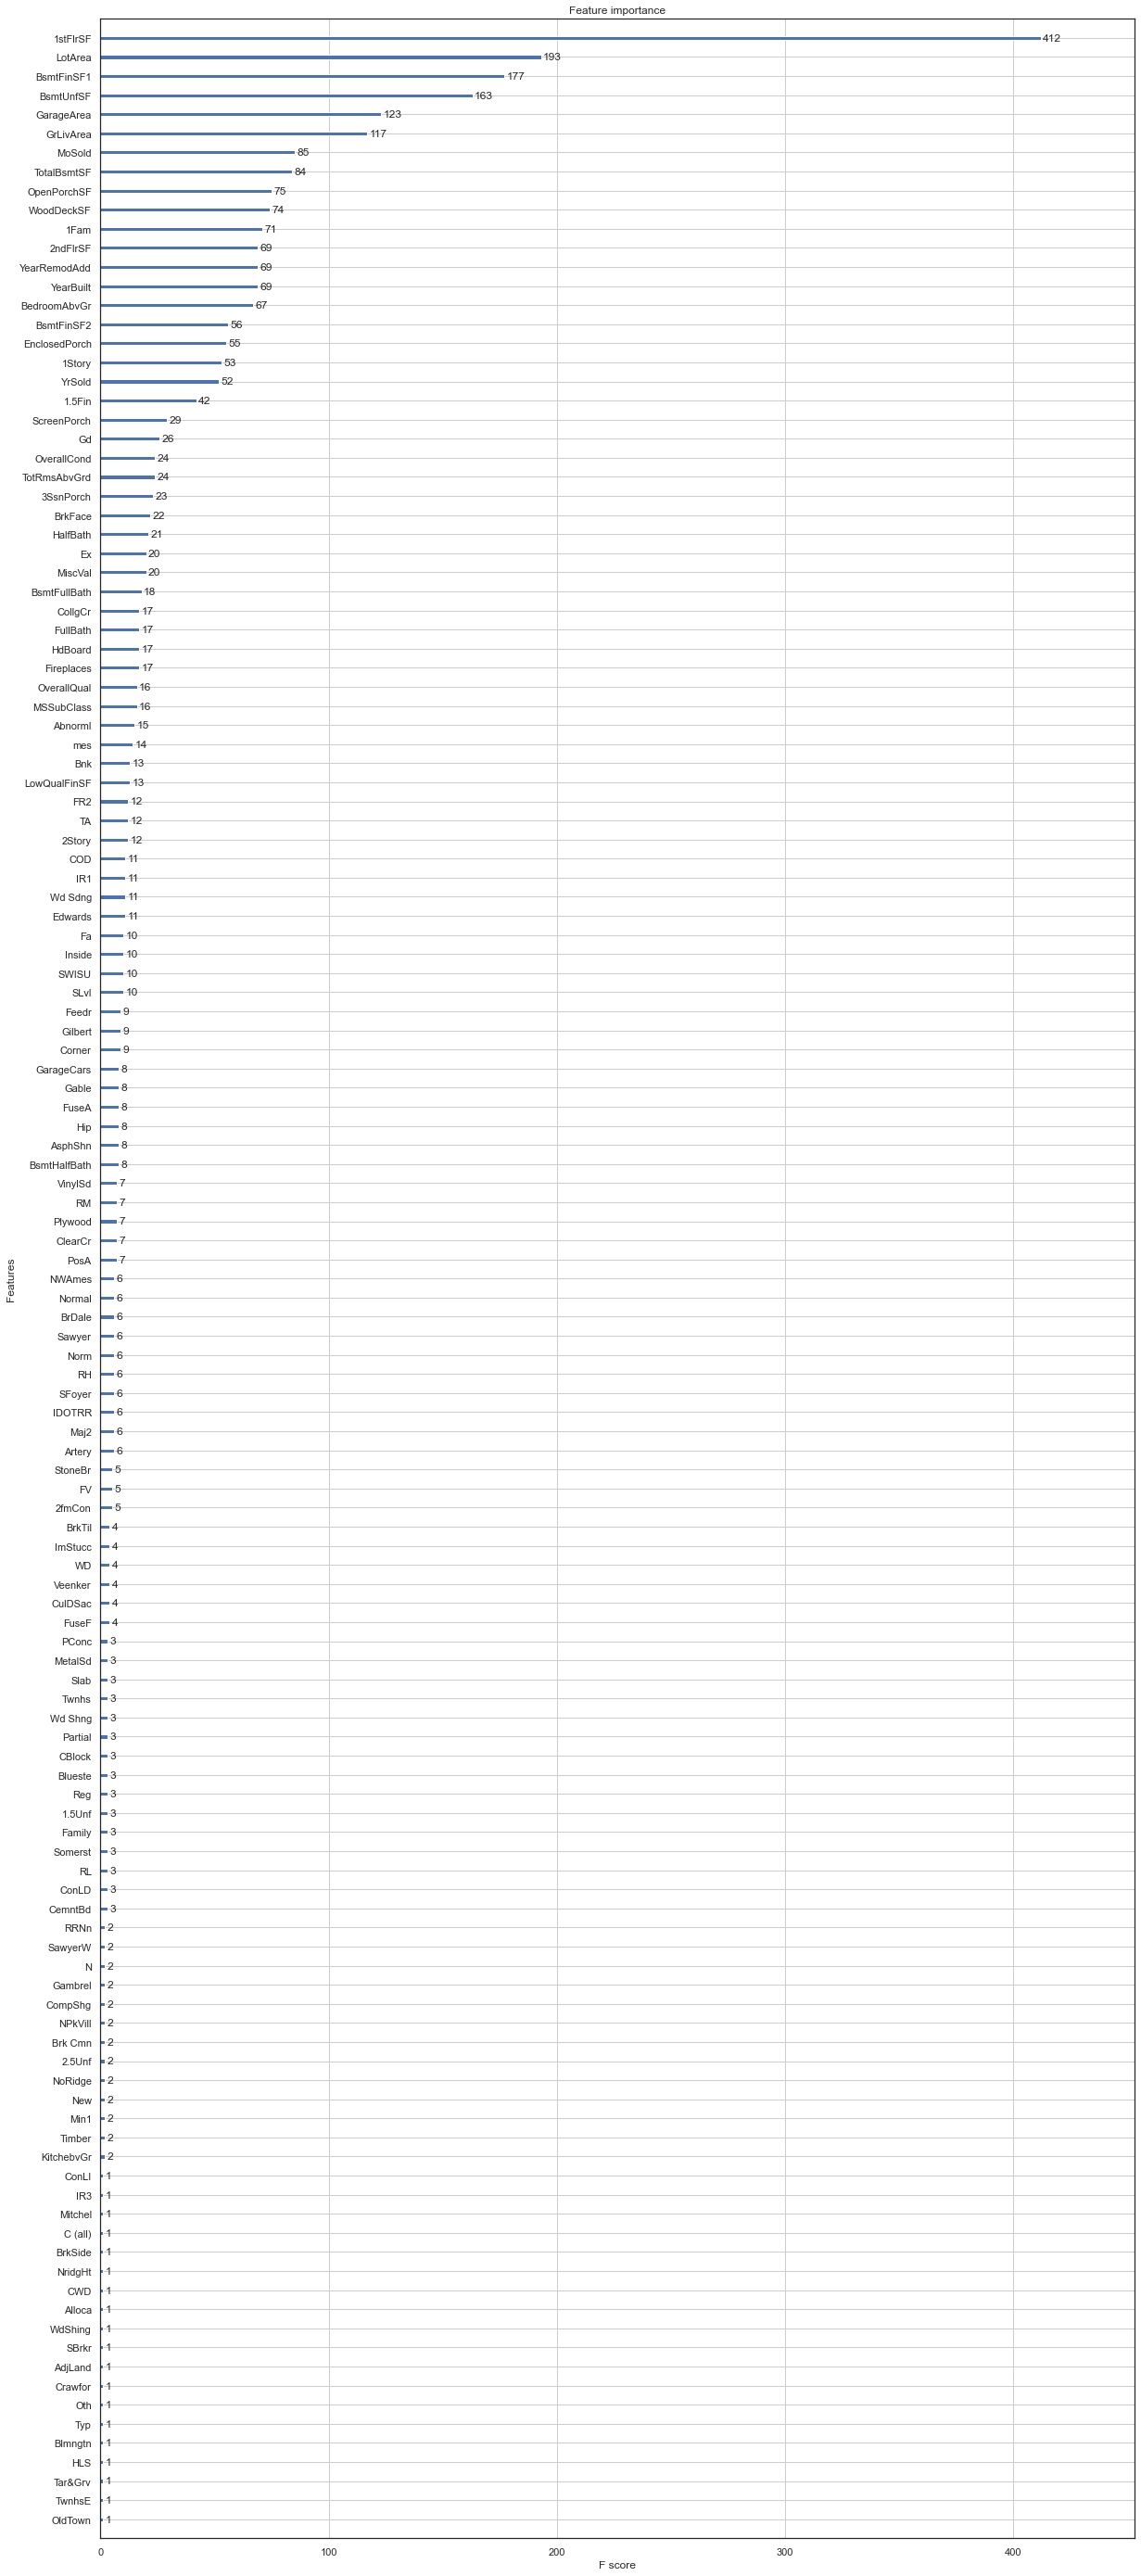

In [164]:
fig, ax = plt.subplots(1,1, figsize=(20,50))
xgb.plot_importance(xgbR, ax=ax)
plt.show()

In [174]:
len(xgbR.feature_importances_[np.where(xgbR.feature_importances_>0)])

131

#### Best Variables

In [185]:
selected_variables = X_train.columns.values[np.where(xgbR.feature_importances_>np.median(xgbR.feature_importances_))]

In [186]:
selected_variables

array(['1.5Fin', '1stFlrSF', '2Story', '2fmCon', '2ndFlrSF', '3SsnPorch',
       'Alloca', 'Artery', 'AsphShn', 'BedroomAbvGr', 'Blmngtn',
       'Blueste', 'Bnk', 'Brk Cmn', 'BrkFace', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtFullBath', 'BsmtUnfSF', 'COD', 'CemntBd', 'ClearCr',
       'CollgCr', 'ConLD', 'Corner', 'CulDSac', 'Edwards',
       'EnclosedPorch', 'Ex', 'FR2', 'FV', 'Fa', 'Feedr', 'Fireplaces',
       'FullBath', 'FuseF', 'GarageArea', 'Gd', 'Gilbert', 'GrLivArea',
       'HalfBath', 'HdBoard', 'IDOTRR', 'IR1', 'Inside', 'KitchebvGr',
       'LotArea', 'LowQualFinSF', 'MSSubClass', 'Maj2', 'Min1', 'MiscVal',
       'MoSold', 'NPkVill', 'NoRidge', 'Normal', 'OldTown', 'OpenPorchSF',
       'OverallQual', 'Partial', 'Plywood', 'PosA', 'RH', 'RL', 'RM',
       'Reg', 'SBrkr', 'SFoyer', 'SLvl', 'SWISU', 'ScreenPorch',
       'Somerst', 'Tar&Grv', 'Timber', 'TotRmsAbvGrd', 'TotalBsmtSF',
       'TwnhsE', 'WD', 'Wd Sdng', 'WdShing', 'WoodDeckSF', 'YearBuilt',
       'YearRemodAdd

In [188]:
std = StandardScaler()
selected_variables = np.append(selected_variables, "SalePrice")
df_scale = std.fit_transform(df_combine[selected_variables])
df_scale = pd.DataFrame(df_scale, columns=selected_variables)
X = df_scale.drop("SalePrice", axis=1)
y = df_scale["SalePrice"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.15, random_state=42)

### SVR

In [189]:
svr = SVR(kernel="linear")
svr.fit(X_train, y_train)
svr.score(X_val, y_val)

0.02937190616972518

In [190]:
kernel = ['linear', 'poly', 'rbf', 'sigmoid']
C = np.arange(0.1, 1.5, 0.1)
epsilon = [0.01,0.1,0.5]
res = []

In [191]:
print("Number of iterations: ",(len(kernel)*len(C)*len(epsilon)))

Number of iterations:  168


In [192]:
%time
i=1
for k in kernel:
    for c in C:
        for e in epsilon:
            print("Iteration: {} -- SVR with {} C={} Epsilon={}".format(i,k,c,e))
            svr = SVR(kernel=k, C=c, epsilon=e)
            svr.fit(X_train, y_train)
            print("Score: ",svr.score(X_val, y_val))
            y_pred = svr.predict(X_val)
            res.append({"c":c, "e": e, "kernel":k, "acc":svr.score(X_val, y_val), "mae":mean_absolute_error(y_val, y_pred) ,"mse":mean_squared_error(y_val, y_pred)})
            i+=1

Wall time: 1 ms
Iteration: 1 -- SVR with linear C=0.1 Epsilon=0.01
Score:  -0.01958778309589415
Iteration: 2 -- SVR with linear C=0.1 Epsilon=0.1
Score:  0.029294792005815196
Iteration: 3 -- SVR with linear C=0.1 Epsilon=0.5
Score:  0.053110719523470795
Iteration: 4 -- SVR with linear C=0.2 Epsilon=0.01
Score:  -0.019487028626383296
Iteration: 5 -- SVR with linear C=0.2 Epsilon=0.1
Score:  0.02934951934850827
Iteration: 6 -- SVR with linear C=0.2 Epsilon=0.5
Score:  0.05308849667954463
Iteration: 7 -- SVR with linear C=0.30000000000000004 Epsilon=0.01
Score:  -0.01947723687753089
Iteration: 8 -- SVR with linear C=0.30000000000000004 Epsilon=0.1
Score:  0.029370694722025692
Iteration: 9 -- SVR with linear C=0.30000000000000004 Epsilon=0.5
Score:  0.053137908580071835
Iteration: 10 -- SVR with linear C=0.4 Epsilon=0.01
Score:  -0.01947980309893116
Iteration: 11 -- SVR with linear C=0.4 Epsilon=0.1
Score:  0.0294142767799348
Iteration: 12 -- SVR with linear C=0.4 Epsilon=0.5
Score:  0.053

Score:  -0.003370161881082856
Iteration: 99 -- SVR with rbf C=0.5 Epsilon=0.5
Score:  0.04684048321064027
Iteration: 100 -- SVR with rbf C=0.6 Epsilon=0.01
Score:  -0.024407526723128514
Iteration: 101 -- SVR with rbf C=0.6 Epsilon=0.1
Score:  -0.0026327133697578997
Iteration: 102 -- SVR with rbf C=0.6 Epsilon=0.5
Score:  0.04412577869767709
Iteration: 103 -- SVR with rbf C=0.7000000000000001 Epsilon=0.01
Score:  -0.024420769917418594
Iteration: 104 -- SVR with rbf C=0.7000000000000001 Epsilon=0.1
Score:  -0.002005153001717108
Iteration: 105 -- SVR with rbf C=0.7000000000000001 Epsilon=0.5
Score:  0.04095660047176941
Iteration: 106 -- SVR with rbf C=0.8 Epsilon=0.01
Score:  -0.02442191184820386
Iteration: 107 -- SVR with rbf C=0.8 Epsilon=0.1
Score:  -0.0020318644544754516
Iteration: 108 -- SVR with rbf C=0.8 Epsilon=0.5
Score:  0.03757762408675758
Iteration: 109 -- SVR with rbf C=0.9 Epsilon=0.01
Score:  -0.02464974358058525
Iteration: 110 -- SVR with rbf C=0.9 Epsilon=0.1
Score:  -0.0

In [193]:
minMae = 1000000
minConf = 0
for i in res:
    if i["mae"] < minMae:
        minMae = i["mae"]
        minConf = i

In [194]:
minMae

0.3377122249911858

In [195]:
minConf

{'c': 0.1,
 'e': 0.01,
 'kernel': 'linear',
 'acc': -0.01958778309589415,
 'mae': 0.3377122249911858,
 'mse': 1.033475312865325}

In [196]:
svrFinal = SVR(C=minConf["c"], epsilon=minConf["e"], kernel=minConf["kernel"])
svrFinal.fit(X_train, y_train)

SVR(C=0.1, epsilon=0.01, kernel='linear')

In [197]:
y_pred = svrFinal.predict(X_test)
print("Test MAE: ", mean_absolute_error(y_test, y_pred))
print("Test MSE: ", mean_squared_error(y_test, y_pred))

Test MAE:  0.43570188091604933
Test MSE:  1.3454088505381454


In [198]:
y_pred = svrFinal.predict(X)
y_pred = pd.DataFrame({"SalePrice":y_pred})
res = pd.concat([y_pred, X], axis=1)
res = std.inverse_transform(res)

In [201]:
print("Test MAE: ", mean_absolute_error(df_combine["SalePrice"], y_pred))
print("Test MSE: ", mean_squared_error(df_combine["SalePrice"], y_pred))

Test MAE:  1621925800.1892226
Test MSE:  2.9008932829863076e+18
